In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import cast
from matplotlib.figure import Figure

In [4]:
def get_scatter(A: pd.Series, B: pd.Series, title: str):
    plt.clf()
    sample_n = min(len(A), len(A))
    A = A.sample(n=sample_n, random_state=1)
    B = B.sample(n=sample_n, random_state=1)
    pearson_corr = A.corr(B)
    ax = sns.regplot(x=A, y=B)
    ax.set_title(title)
    ax.set_xlabel("A RPKM")
    ax.set_ylabel("B RPKM")
    plt.scatter([], [], label=f"N={sample_n} \nR={pearson_corr}")
    plt.legend()
    return cast(Figure, ax.get_figure())

In [12]:
file_A = "/oak/stanford/groups/engreitz/Users/atan5133/ABC-Enhancer-Gene-Prediction/results/K562_dhs_noqnorm/Neighborhoods/GeneList.txt"
file_B = "/oak/stanford/groups/engreitz/Users/atan5133/ABC-Enhancer-Gene-Prediction/results/K562_dhs_peaks_ENCFF534DCE_150bp/Neighborhoods/GeneList.txt"

In [13]:
df_A = pd.read_csv(file_A, sep='\t')
df_B = pd.read_csv(file_B, sep='\t')
A_col = "ATAC.RPKM.TSS1Kb" if "ATAC.RPKM.TSS1Kb" in df_A else "DHS.RPKM.TSS1Kb"
B_col = "ATAC.RPKM.TSS1Kb" if "ATAC.RPKM.TSS1Kb" in df_B else "DHS.RPKM.TSS1Kb"

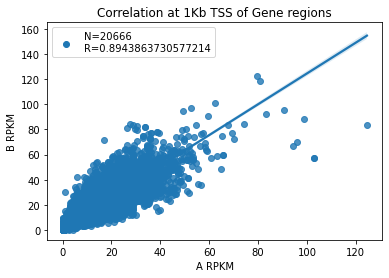

In [14]:
ax = get_scatter(df_A[A_col], df_B[B_col], title="Correlation at 1Kb TSS of Gene regions")

In [6]:
## Compare PLOIDY

In [7]:
from subprocess import check_output
import os
def get_total_chrom_reads(feature_input):
    # Returns Dict[str, int]
    filename = os.path.basename(feature_input)
    if filename.endswith(".bam"):
        command = "conda run -n scripts samtools idxstats " + feature_input
        data = check_output(command, shell=True)
        lines = data.decode("ascii").split("\n")
        lines = [line for line in lines if line.startswith('chr')]
        df = pd.DataFrame(
            [line.split("\t") for line in lines],
            columns=["chrom", "SeqLength", "MappedReads", "UnmappedReads"],
        ).set_index("chrom")
        return df["MappedReads"].astype(int)

    else:
        raise RuntimeError("Format not supported yet: " + feature_input)

In [11]:
bam_A = "/oak/stanford/groups/engreitz/Users/atan5133/data/ENCODE/T-Cell/ENCFF485IKK.sorted.bam"
bam_B = "/oak/stanford/groups/engreitz/Users/atan5133/data/ENCODE/T-Cell/ENCFF476TCF.sorted.bam"

In [12]:
A_chrom_reads = get_total_chrom_reads(bam_A)
A_total_reads = A_chrom_reads[:24].sum()
B_chrom_reads = get_total_chrom_reads(bam_B)
B_total_reads = B_chrom_reads[:24].sum()

In [13]:
A_read_ratios = A_chrom_reads[:24] / A_total_reads
B_read_ratios = B_chrom_reads[:24] / B_total_reads
A_read_ratios / B_read_ratios

chrom
chr1     0.994675
chr2     0.966327
chr3     0.923748
chr4     0.896833
chr5     0.929944
chr6     0.916056
chr7     1.006485
chr8     0.994583
chr9     1.026910
chr10    1.064314
chr11    0.994704
chr12    0.959178
chr13    0.894451
chr14    0.945747
chr15    1.072292
chr16    1.111742
chr17    1.057889
chr18    1.005079
chr19    1.036443
chr20    1.195265
chr21    1.027660
chr22    1.199121
chrX     1.058145
chrY     0.865182
Name: MappedReads, dtype: float64